In [107]:
%matplotlib inline
import matplotlib.pyplot as plt

In [108]:
import bt
import pandas as pd
import numpy as np

In [4]:
tickers = {
'equity':['ITOT', 'IVV', 'IJH', 'IJR', 'IUSG', 'IUSV', 'IJK', 'IJJ', 'IJS', 'IJT', 'OEF', 'IWC'],
'bond':['AGG', 'LQD', 'GOVT', 'MBB', 'MUB', 'TIP', 'SHY', 'IEF', 'TLT', 'HYG', 'FLOT', 'CMBS'],
}
prices = bt.data.get(tickers['equity'] + tickers['bond'], clean_tickers=False)

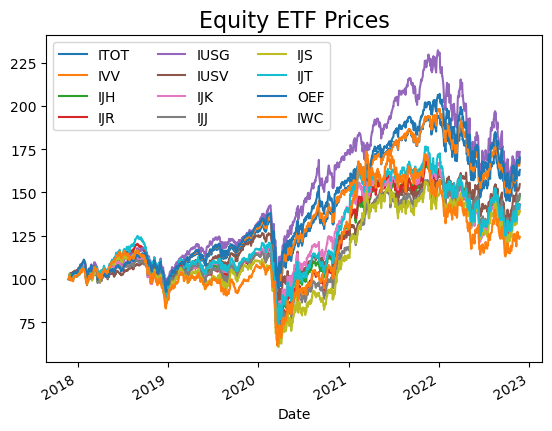

,annualized monthly return,annualized monthly volatility,annualized monthly sharpe
ITOT,10.623122,18.886660,0.562467
IVV,11.163948,18.448719,0.605134
IJH,8.991816,21.968049,0.409313
IJR,9.068300,23.581359,0.384554
IUSG,12.384665,20.146926,0.614717
IUSV,9.091590,18.807030,0.483414
IJK,8.094344,21.174182,0.382274
IJJ,9.412663,23.638840,0.398186
IJS,8.872060,25.237813,0.351538
IJT,8.872395,22.886672,0.387666


In [19]:
prices[tickers['equity']].rebase().plot()
plt.title('Equity ETF Prices', {'fontsize': 16})
plt.legend(ncol=3)
plt.show()

mtest = prices[tickers['equity']].asfreq('m', method='ffill').pct_change().dropna()
pd.DataFrame.from_dict({
    'annualized monthly return': mtest.mean() * 12 * 100,
    'annualized monthly volatility': mtest.std() * np.sqrt(12) * 100,
    'annualized monthly sharpe': mtest.mean() / mtest.std() * np.sqrt(12)
})

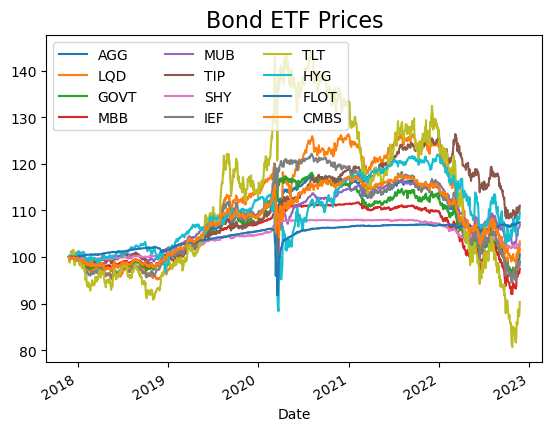

,AGG,LQD,GOVT,MBB,MUB,TIP,SHY,IEF,TLT,HYG,FLOT,CMBS
annualized monthly return,-0.38,-0.18,-0.44,-1.16,0.64,2.16,0.47,-0.49,-2.36,1.69,1.38,0.06
annualized monthly volatility,4.90,8.68,4.99,4.42,4.55,5.85,1.57,6.58,13.98,9.27,2.47,4.35
annualized monthly sharpe,-0.08,-0.02,-0.09,-0.26,0.14,0.37,0.30,-0.07,-0.17,0.18,0.56,0.01


In [18]:
prices[tickers['bond']].rebase().plot()
plt.title('Bond ETF Prices',{'fontsize':16})
plt.legend(ncol=3)
plt.show()

# performance stats for backtests
mtest = prices[tickers['bond']].asfreq('m',method='ffill').pct_change().dropna()
pd.DataFrame.from_dict({
 'annualized monthly return': mtest.mean()*12*100,
 'annualized monthly volatility': mtest.std()*np.sqrt(12)*100,
 'annualized monthly sharpe': mtest.mean() / mtest.std() * np.sqrt(12),
}).T.round(2)

In [52]:
pd.DataFrame.from_dict(
    {k: v.stats for k,v in bt.ffn.calc_stats(prices).items()}
)

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)


,ITOT,IVV,IJH,IJR,IUSG,IUSV,IJK,IJJ,IJS,IJT,...,GOVT,MBB,MUB,TIP,SHY,IEF,TLT,HYG,FLOT,CMBS
start,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,...,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00,2017-11-27 00:00:00
end,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,...,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00,2022-11-23 00:00:00
rf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_return,0.630618,0.688624,0.481336,0.43186,0.73438,0.548131,0.419985,0.492357,0.392961,0.428605,...,-0.009963,-0.025238,0.069648,0.110389,0.026202,-0.009826,-0.096325,0.095485,0.074461,0.017633
cagr,0.102985,0.110741,0.081958,0.074615,0.11671,0.091566,0.072822,0.083567,0.068698,0.074125,...,-0.002005,-0.005111,0.013589,0.021213,0.005198,-0.001978,-0.0201,0.01845,0.014501,0.00351
max_drawdown,-0.350039,-0.339031,-0.421835,-0.443587,-0.323473,-0.375372,-0.392515,-0.461134,-0.47681,-0.420345,...,-0.189567,-0.176377,-0.136808,-0.1436,-0.057071,-0.226478,-0.441357,-0.220287,-0.135358,-0.158715
calmar,0.294209,0.326639,0.194289,0.168208,0.360803,0.243935,0.185527,0.18122,0.144078,0.176342,...,-0.010578,-0.028979,0.099327,0.147721,0.091088,-0.008732,-0.04554,0.083755,0.107134,0.022116
mtd,0.038864,0.04211,0.048365,0.029616,0.034011,0.048445,0.04409,0.052144,0.028944,0.030788,...,0.023245,0.039448,0.042226,0.011091,0.00397,0.031133,0.076934,0.027478,0.005013,0.023755
three_month,-0.022624,-0.020108,0.014881,-0.003158,-0.071288,0.032883,0.000999,0.027562,0.00805,-0.015928,...,-0.029694,-0.033521,-0.00277,-0.056015,-0.011291,-0.039962,-0.072023,-0.000988,0.00852,-0.036929
six_month,0.021122,0.022229,0.066392,0.046646,0.002606,0.043812,0.067889,0.063974,0.037183,0.056226,...,-0.04122,-0.038035,0.007871,-0.053536,-0.017224,-0.048978,-0.103025,0.004864,0.008516,-0.036799


In [53]:
aggressive = bt.Strategy('aggressive', 
     algos = [
        bt.algos.RunQuarterly(),
        bt.algos.SelectAll(),
        bt.algos.WeighSpecified(ITOT=0.8, AGG=0.2),
        bt.algos.Rebalance()
     ]
)

moderate = bt.Strategy('moderate', 
 algos = [
 bt.algos.RunQuarterly(),
 bt.algos.SelectAll(),
 bt.algos.WeighSpecified(ITOT=0.6,AGG=0.4),
 bt.algos.Rebalance(),
 ]
)

conservative = bt.Strategy('conservative', 
 algos = [
 bt.algos.RunQuarterly(),
 bt.algos.SelectAll(),
 bt.algos.WeighSpecified(ITOT=0.4,AGG=0.6),
 bt.algos.Rebalance(),
 ]
)

In [56]:
backtest_aggressive = bt.Backtest(aggressive, prices)
backtest_moderate = bt.Backtest(moderate, prices)
backtest_conservative = bt.Backtest(conservative, prices)

report = bt.run(backtest_aggressive, backtest_moderate, backtest_conservative)

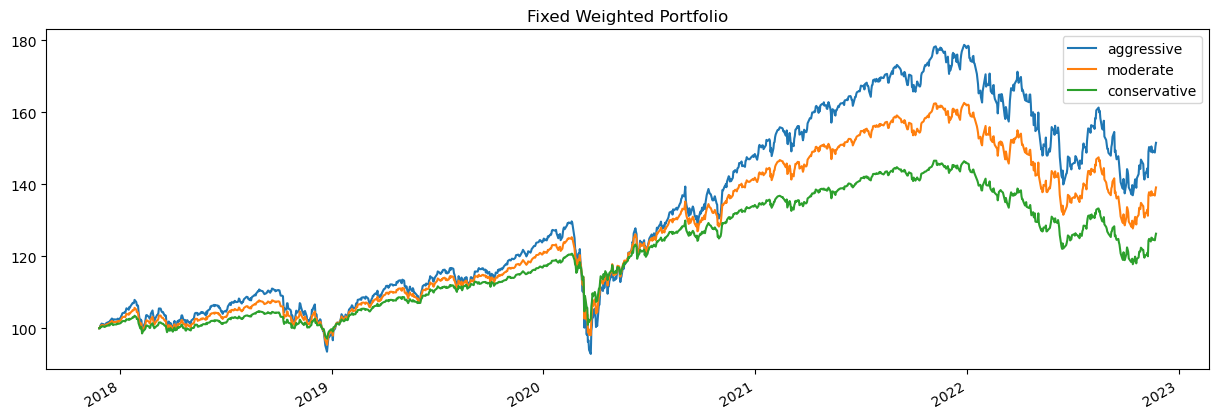

In [58]:
report.plot()
plt.title("Fixed Weighted Portfolio")
plt.show()

In [59]:
report.display_lookback_returns()

,aggressive,moderate,conservative
mtd,3.82%,3.75%,3.67%
3m,-2.38%,-2.50%,-2.61%
6m,1.09%,0.01%,-1.12%
ytd,-14.80%,-14.08%,-13.46%
1y,-14.14%,-13.42%,-12.78%
3y,7.79%,5.55%,3.04%
5y,8.68%,6.84%,4.79%
10y,nan%,nan%,nan%
incep,8.68%,6.84%,4.79%


In [60]:
report.display_monthly_returns(backtest='aggressive')

  Year    Jan    Feb     Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  ------  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2017   0      0       0      0      0      0      0      0      0      0      1.3    1.06    2.37
  2018   3.95  -3.26   -1.41   0.08   2.39   0.58   2.63   2.91  -0     -6.01   1.67  -6.81   -3.9
  2019   6.94   2.84    1.57   3.09  -4.73   5.71   1.06  -0.95   1.29   1.81   3.01   2.31   26.14
  2020   0.31  -6.08  -10.92  11.26   4.43   2.03   4.89   5.53  -2.92  -1.63   9.8    3.58   19.59
  2021  -0.38   2.24    2.7    4.25   0.4    2.06   1.69   2.23  -3.82   5.32  -1.11   2.99   19.83
  2022  -5.12  -2.25    1.97  -7.98  -0     -6.87   7.9   -3.66  -8.24   6.16   3.82   0     -14.8


In [61]:
report.set_riskfree_rate(0.01)

In [62]:
report.display()

Stat                 aggressive    moderate    conservative
-------------------  ------------  ----------  --------------
Start                2017-11-26    2017-11-26  2017-11-26
End                  2022-11-23    2022-11-23  2022-11-23
Risk-free rate       1.00%         1.00%       1.00%

Total Return         51.53%        39.13%      26.28%
Daily Sharpe         0.51          0.49        0.43
Daily Sortino        0.77          0.74        0.64
CAGR                 8.68%         6.84%       4.79%
Max Drawdown         -28.41%       -21.74%     -19.63%
Calmar Ratio         0.31          0.31        0.24

MTD                  3.82%         3.75%       3.67%
3m                   -2.38%        -2.50%      -2.61%
6m                   1.09%         0.01%       -1.12%
YTD                  -14.80%       -14.08%     -13.46%
1Y                   -14.14%       -13.42%     -12.78%
3Y (ann.)            7.79%         5.55%       3.04%
5Y (ann.)            8.68%         6.84%       4.79%
10Y (ann.)  

In [66]:
m3m = bt.Strategy('3m', 
 algos = [
    bt.algos.RunQuarterly(),
    bt.algos.RunAfterDate('2013-03-31'),
    bt.algos.SelectAll(),
    bt.algos.SelectMomentum(n=4,lookback=pd.DateOffset(months=3)),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
 ]
)
m6m = bt.Strategy('6m', 
 algos = [
    bt.algos.RunQuarterly(),
    bt.algos.RunAfterDate('2013-03-31'),
    bt.algos.SelectAll(),
    bt.algos.SelectMomentum(n=4,lookback=pd.DateOffset(months=6)),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
 ]
)
m9m = bt.Strategy('9m', 
 algos = [
    bt.algos.RunQuarterly(),
    bt.algos.RunAfterDate('2013-03-31'),
    bt.algos.SelectAll(),
    bt.algos.SelectMomentum(n=4,lookback=pd.DateOffset(months=9)),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
 ]
)
m1y = bt.Strategy('1y', 
 algos = [
    bt.algos.RunQuarterly(),
    bt.algos.RunAfterDate('2013-03-31'),
    bt.algos.SelectAll(),
    bt.algos.SelectMomentum(n=4,lookback=pd.DateOffset(years=1)),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
 ]
)

In [ ]:
backtest_m3m = bt.Backtest(m3m, prices[tickers['equity']])
backtest_m6m = bt.Backtest(m6m, prices[tickers['equity']])
backtest_m9m = bt.Backtest(m9m, prices[tickers['equity']])
backtest_m1y = bt.Backtest(m1y, prices[tickers['equity']])
report2 = bt.run(backtest_m3m, backtest_m6m, backtest_m9m, backtest_m1y)

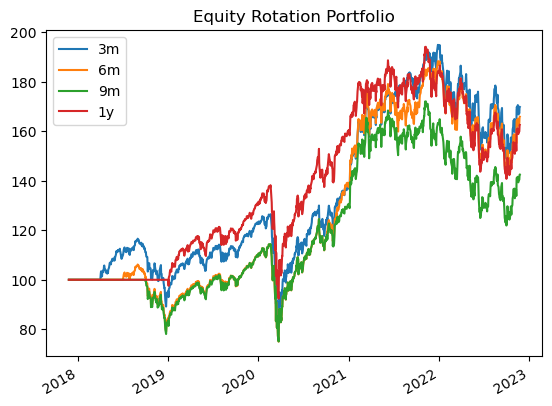

In [70]:
report2.prices['2013-3-31':].plot()
plt.title('Equity Rotation Portfolio')
plt.show()

In [79]:
MeanVar = bt.Strategy('MeanVar', 
 algos = [
    bt.algos.RunQuarterly(),
    bt.algos.RunAfterDate('2013-03-31'),
    bt.algos.SelectAll(),
    bt.algos.WeighMeanVar(lookback=pd.DateOffset(years=1),),
    bt.algos.Rebalance()
 ]
)

ERC = bt.Strategy('ERC', 
 algos = [
    bt.algos.RunQuarterly(),
    bt.algos.RunAfterDate('2013-03-31'),
    bt.algos.SelectAll(),
    bt.algos.WeighERC(lookback=pd.DateOffset(years=1),),
    bt.algos.Rebalance()
 ]
)

InvVol = bt.Strategy('InvVol', 
 algos = [
    bt.algos.RunQuarterly(),
    bt.algos.RunAfterDate('2013-03-31'),
    bt.algos.SelectAll(),
    bt.algos.WeighInvVol(lookback=pd.DateOffset(years=1),),
    bt.algos.Rebalance()
 ]
)

In [106]:
backtest_iv.positions.head(100)

,ITOT,IVV,IJH,IJR,IUSG,IUSV,IJK,IJJ,IJS,IJT,OEF,IWC
2017-11-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-13,1478.0,327.0,491.0,1131.0,1464.0,1804.0,1597.0,1216.0,1176.0,951.0,720.0,921.0
2018-04-16,1478.0,327.0,491.0,1131.0,1464.0,1804.0,1597.0,1216.0,1176.0,951.0,720.0,921.0
2018-04-17,1478.0,327.0,491.0,1131.0,1464.0,1804.0,1597.0,1216.0,1176.0,951.0,720.0,921.0
2018-04-18,1478.0,327.0,491.0,1131.0,1464.0,1804.0,1597.0,1216.0,1176.0,951.0,720.0,921.0


In [109]:
backtest_mv = bt.Backtest(MeanVar, prices[tickers['equity']])
backtest_erc = bt.Backtest(ERC, prices[tickers['equity']])
backtest_iv = bt.Backtest(InvVol, prices[tickers['equity']])
report3 = bt.run(backtest_mv, backtest_iv, backtest_erc)

ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 1 is required.

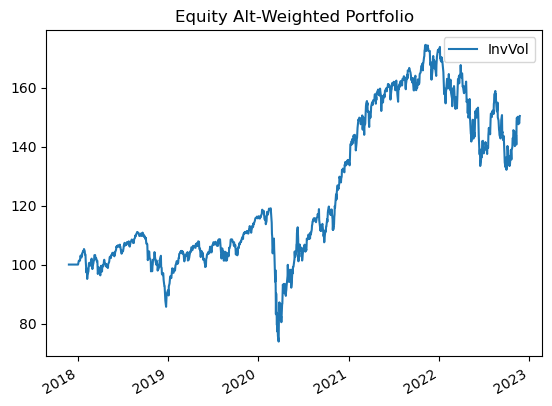

In [100]:
report3.prices['2013-03-31':].plot()
plt.title('Equity Alt-Weighted Portfolio')
plt.show()

In [110]:
equity = bt.Strategy('equity',
 algos = [bt.algos.RunQuarterly(),
 bt.algos.RunAfterDate('2013-03-31'),
 bt.algos.SelectAll(),
 bt.algos.SelectMomentum(n=2,lookback=pd.DateOffset(months=3)),
 bt.algos.WeighInvVol(lookback=pd.DateOffset(years=1),),
 bt.algos.Rebalance()],
 children = tickers['equity']
)
bond = bt.Strategy('bond',
 algos = [bt.algos.RunQuarterly(),
 bt.algos.RunAfterDate('2013-03-31'),
 bt.algos.SelectAll(),
 bt.algos.SelectMomentum(n=2,lookback=pd.DateOffset(months=3)),
 bt.algos.WeighEqually(),
 bt.algos.Rebalance()],
 children = tickers['bond']
)
pooled = bt.Strategy('pooled', 
 algos = [bt.algos.RunQuarterly(),
 bt.algos.SelectAll(),
 bt.algos.WeighSpecified(equity=0.8,bond=0.2),
 bt.algos.Rebalance()], 
 children = [equity,bond]
)

In [111]:
backtest_equity = bt.Backtest(equity,prices)
backtest_bond = bt.Backtest(bond,prices)
backtest_pooled = bt.Backtest(pooled,prices)
report4 = bt.run(backtest_equity, backtest_bond, backtest_pooled)

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/ut

/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/utils/__init__.py:312: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(**kwargs)
/Users/jonathanl/Workspace/quant-workspace/env/lib/python3.9/site-packages/future/ut

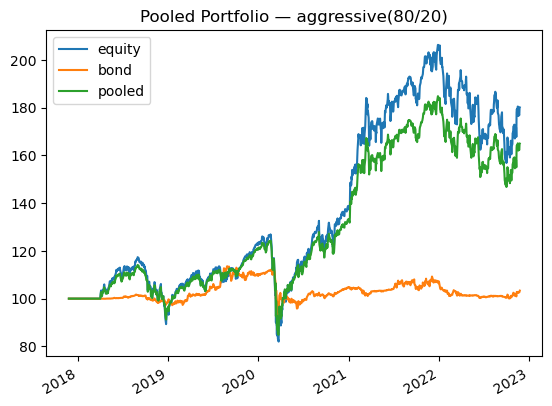

In [113]:
report4.prices['2013-03-31':].plot()
plt.title('Pooled Portfolio — aggressive(80/20)')
plt.show()

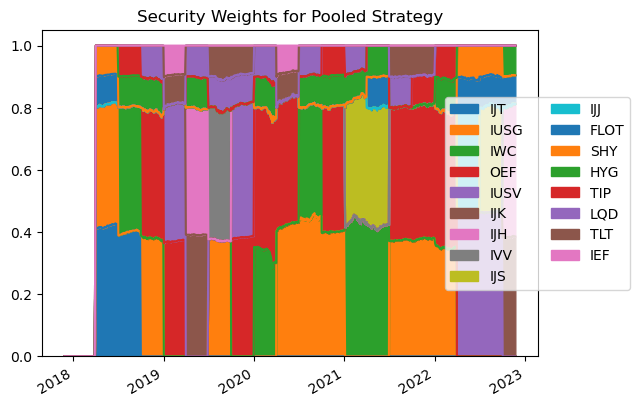

In [114]:
report4.get_security_weights('pooled')['2013-03-31':].plot.area()
plt.title('Security Weights for Pooled Strategy')
plt.legend(ncol=2,loc='right',bbox_to_anchor=(1.2,0.5))
plt.show()

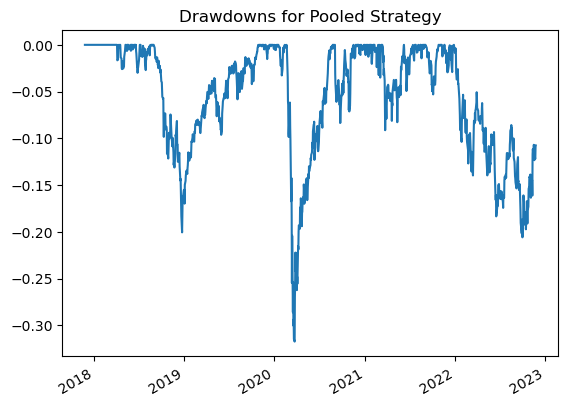

Top 5 Drawdowns:


,Start,End,Length,drawdown
26,2020-02-20 00:00:00,2020-08-24 00:00:00,186,-0.317374
57,2021-12-28 00:00:00,2022-11-23 00:00:00,330,-0.205882
14,2018-09-04 00:00:00,2019-10-30 00:00:00,421,-0.200571
46,2021-03-15 00:00:00,2021-06-08 00:00:00,85,-0.091299
29,2020-09-03 00:00:00,2020-11-16 00:00:00,74,-0.083621


In [116]:
report4.backtests['pooled'].stats.drawdown['2013-03-31':].plot()
plt.title('Drawdowns for Pooled Strategy')
plt.show()
print('Top 5 Drawdowns:')
report4.backtests['pooled'].stats.drawdown_details.sort_values('drawdown').head(5)

In [117]:
print('Performance Summary for Pooled Strategy:\n')
report4.backtests['pooled'].stats.set_riskfree_rate(0.01)
report4.backtests['pooled'].stats.display()

Performance Summary for Pooled Strategy:

Stats for price from 2017-11-26 00:00:00 - 2022-11-23 00:00:00
Annual risk-free rate considered: 1.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
64.91%              0.58  10.54%  -31.74%

Annualized Returns:
mtd    3m     6m     ytd     1y      3y      5y      10y    incep.
-----  -----  -----  ------  ------  ------  ------  -----  --------
4.06%  0.63%  2.13%  -9.99%  -8.75%  11.93%  10.54%  -      10.54%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.58     0.64       0.55
mean    11.75%   11.38%     11.90%
vol     18.50%   16.33%     19.67%
skew    -0.89    -0.76      0.26
kurt    12.28    0.79       -1.79
best    7.00%    9.68%      37.46%
worst   -10.29%  -14.37%    -9.99%

Drawdowns:
max      avg       # days
-------  ------  --------
-31.74%  -2.56%     25.98

Misc:
---------------  ------
avg. up month    3.58%
avg. down month  